In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
fruits = pd.read_csv('fruit_data_with_colors.txt',sep='\t')

# Creating Data

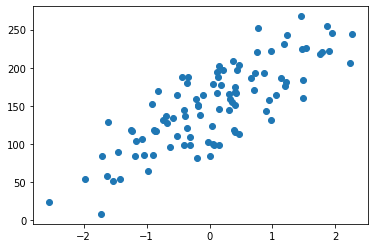

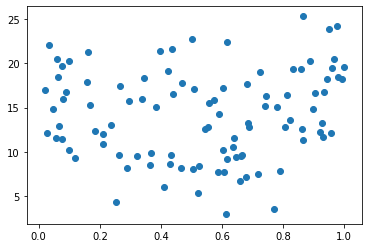

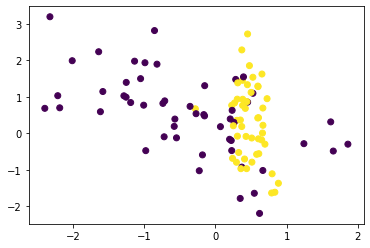

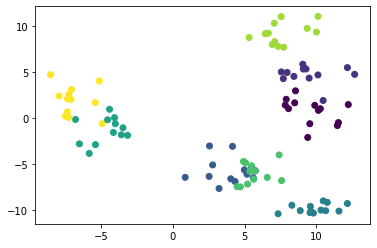

In [7]:
from sklearn.datasets import make_friedman1, make_regression, make_blobs,make_classification

X_R1, y_R1 = make_regression(n_samples=100, n_features=1, n_informative=1, bias=150,noise=30, random_state=0)
plt.scatter(X_R1, y_R1)
plt.show()

X_f1, y_f1 = make_friedman1(n_samples=100, n_features=7, random_state=0)
plt.scatter(X_f1[:,2], y_f1)
plt.show()

X_c1, y_c1 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                                 n_clusters_per_class=1, flip_y=0.1,class_sep=0.5,random_state=0 )

plt.scatter(X_c1[:,0], X_c1[:,1], c=y_c1)
plt.show()


X_d1, y_d1 = make_blobs(n_samples=100, n_features=2, centers=8, cluster_std=1.3,random_state=4)
plt.scatter(X_d1[:,0], X_d1[:,1], c=y_d1)
plt.show()



In [12]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
y_cancer = pd.DataFrame(cancer['target'], columns=['target'])



dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [24]:
# crime = pd.read_csv('CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
# crime = crime.iloc[:,([5, 6] + list(range(11,26)) + list(range(32, 103)) + [145])].dropna()

X_crime = crime.drop('ViolentCrimesPerPop', axis=1)
y_crime= crime['ViolentCrimesPerPop']

# Naive Bayes Classifier

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier

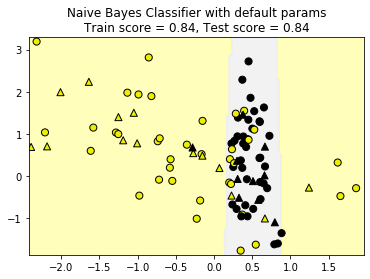

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_c1, y_c1, random_state=0)

nb = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nb, X_train, y_train, X_test, y_test, 'Naive Bayes Classifier with default params')

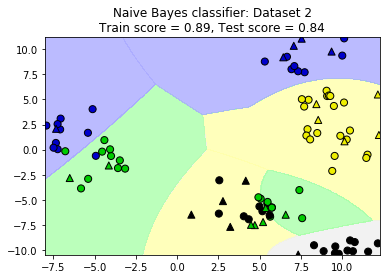

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_d1, y_d1,
                                                   random_state=0)

nb2 = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nb2, X_train, y_train, X_test, y_test,
                                 'Naive Bayes classifier: Dataset 2')

# Real world data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, cancer['target'],
                                                   random_state=0)

nb3 = GaussianNB().fit(X_train, y_train)
print('Accuracy of Naive Bayes Classifier on Cancer dataset is {}'.format(nb3.score(X_test, y_test)))


Accuracy of Naive Bayes Classifier on Cancer dataset is 0.9370629370629371


# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot


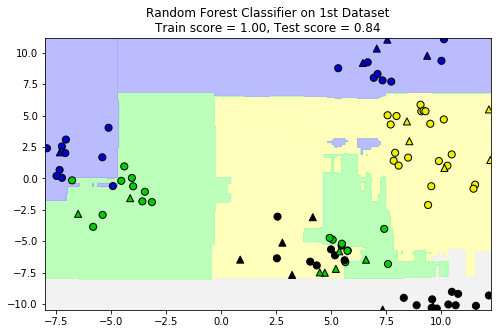

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_d1, y_d1,
                                                   random_state=0)
fig,axes = plt.subplots(1,1,figsize=(8,5))

rf= RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(rf, X_train, y_train, X_test, y_test, 'Random Forest Classifier on 1st Dataset', axes)

In [48]:
X_fruits = fruits.iloc[:,-4:]
y_fruits = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits,random_state=0)


In [70]:
pairwise = [[0,1], [0,2], [0,3], [1,2],[1,3], [2,3]]
# fig,axes = plt.subplots(6,1,figsize=(6,32))

scores = []
for i,pair in enumerate(pairwise):
    X = X_train.iloc[:,pair]
    rf = RandomForestClassifier().fit(X, y_train)
    scores.append(rf.score(X_test.iloc[:,pair], y_test))
    #     plot_class_regions_for_classifier_subplot(rf, X, y_train, None, None, 'Random Forest Classifier on {} pair'.format(pair), axes[i])



In [71]:
for s,p in zip(np.round(scores,2),pairwise):
    print('Accuracy of {} pair is {}'.format(p,s))

[0.6666666666666666, 0.6666666666666666, 0.7333333333333333, 0.6, 0.8, 0.8]

In [72]:
rf = RandomForestClassifier().fit(X_train, y_train)
print('Accuracy of Random Forest Classifier on Fruit dataset is {}'.format(rf.score(X_test, y_test)))


Accuracy of Random Forest Classifier on Fruit dataset is 0.8


# Random Forest on Real World Data

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
rf = RandomForestClassifier(n_estimators=150, max_depth=5).fit(X_train, y_train)

C:\Users\Fida Hussain\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [74]:
print('Accuracy of Random Forest Classifier on Cancer dataset is {}'.format(rf.score(X_test, y_test)))

Accuracy of Random Forest Classifier on Cancer dataset is 0.965034965034965


# Gradient Boosted Trees

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

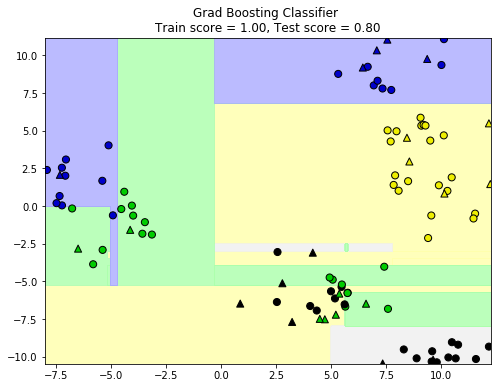

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_d1, y_d1, random_state = 0)
fig,axes = plt.subplots(1,1,figsize=(8,6))
gbc = GradientBoostingClassifier().fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(gbc, X_train, y_train, X_test, y_test, 'Grad Boosting Classifier ', axes)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits,random_state=0)


pairwise = [[0,1], [0,2], [0,3], [1,2],[1,3], [2,3]]
# fig,axes = plt.subplots(6,1,figsize=(6,32))

scores = []
for i,pair in enumerate(pairwise):
    X = X_train.iloc[:,pair]
    gbc = GradientBoostingClassifier().fit(X, y_train)
    scores.append(gbc.score(X_test.iloc[:,pair], y_test))
   

In [94]:
for s,p in zip(np.round(scores,2),pairwise):
    print('Accuracy of {} pair is {}'.format(p,s))

Accuracy of [0, 1] pair is 0.6
Accuracy of [0, 2] pair is 0.6
Accuracy of [0, 3] pair is 0.8
Accuracy of [1, 2] pair is 0.67
Accuracy of [1, 3] pair is 0.73
Accuracy of [2, 3] pair is 0.8


# Real World Dataset

In [102]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

print('Varying the learning rate')
for i in [0.01,0.1]:
    gbc = GradientBoostingClassifier(learning_rate=i).fit(X_train, y_train)
    print('Accuracy of GBC with {} learning rate on Cancer dataset is {}'.format(i,gbc.score(X_test, y_test)))
    
print('Varying the number of trees')
for i in [100,200]:
    gbc = GradientBoostingClassifier(n_estimators=i).fit(X_train, y_train)
    print('Accuracy of GBC with {} trees on Cancer dataset is {}'.format(i,gbc.score(X_test, y_test)))
    
print('Varying the max depth')
for i in [2,4]:
    gbc = GradientBoostingClassifier(max_depth=i).fit(X_train, y_train)
    print('Accuracy of GBC with {} depth on Cancer dataset is {}'.format(i,gbc.score(X_test, y_test)))

Varying the learning rate
Accuracy of GBC with 0.01 learning rate on Cancer dataset is 0.958041958041958
Accuracy of GBC with 0.1 learning rate on Cancer dataset is 0.965034965034965
Varying the number of trees
Accuracy of GBC with 100 trees on Cancer dataset is 0.958041958041958
Accuracy of GBC with 200 trees on Cancer dataset is 0.965034965034965
Varying the max depth
Accuracy of GBC with 2 depth on Cancer dataset is 0.9790209790209791
Accuracy of GBC with 4 depth on Cancer dataset is 0.951048951048951


# Neural Network / MLP classifier

# Activation Function

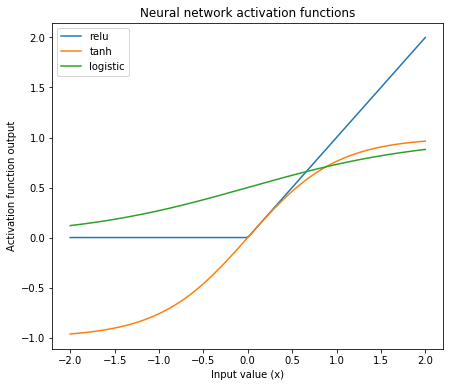

In [106]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

# Classification / Single Hidden Layer

In [108]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X_d1, y_d1,test_size=0.25, random_state=0)


Single Hidden Layer


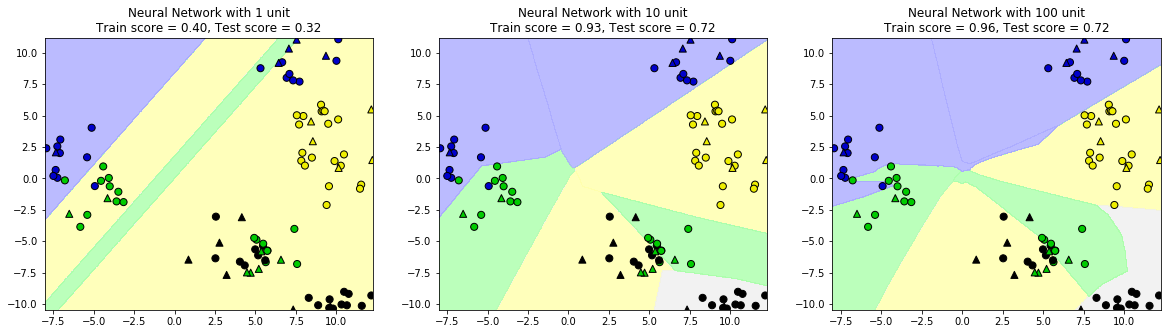

In [119]:
print('Single Hidden Layer')
fig,axes = plt.subplots(1,3,figsize=(20,5))
for i, u in enumerate([1,10,100]):
    mlp = MLPClassifier(hidden_layer_sizes=[u],solver='lbfgs', random_state=0).fit(X_train, y_train)
    plot_class_regions_for_classifier_subplot(mlp, X_train, y_train, X_test, y_test, 'Neural Network with {} unit'.format(u), axes[i])    

Two Hidden Layers


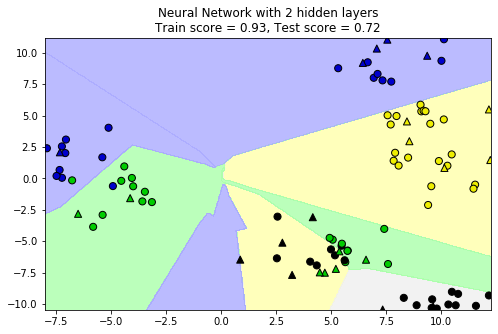

In [120]:
print('Two Hidden Layers')
fig,axes = plt.subplots(1,1,figsize=(8,5))
mlp = MLPClassifier(hidden_layer_sizes=[10,10],solver='lbfgs', random_state=0).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(mlp, X_train, y_train, X_test, y_test, 'Neural Network with 2 hidden layers', axes) 


# Vary Parameter Alpha

Double Hidden Layer


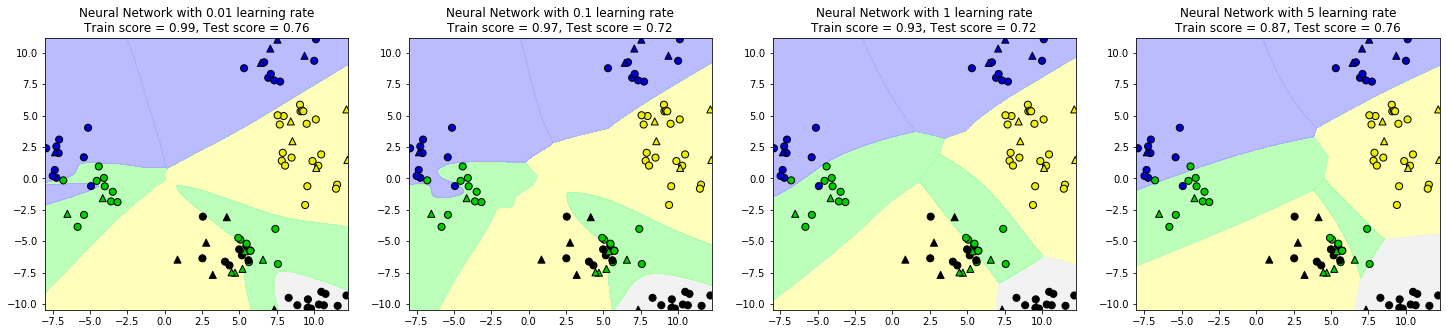

In [123]:
print('Double Hidden Layer')
fig,axes = plt.subplots(1,4,figsize=(25,5))
for i, u in enumerate([0.01,0.1,1,5]):
    mlp = MLPClassifier(hidden_layer_sizes=[100,100],solver='lbfgs',activation='tanh', alpha=u ,random_state=0).fit(X_train, y_train)
    plot_class_regions_for_classifier_subplot(mlp, X_train, y_train, X_test, y_test, 'Neural Network with {} learning rate'.format(u), axes[i]) 

# Effect of Diff Choices of Activation

Double Hidden Layer


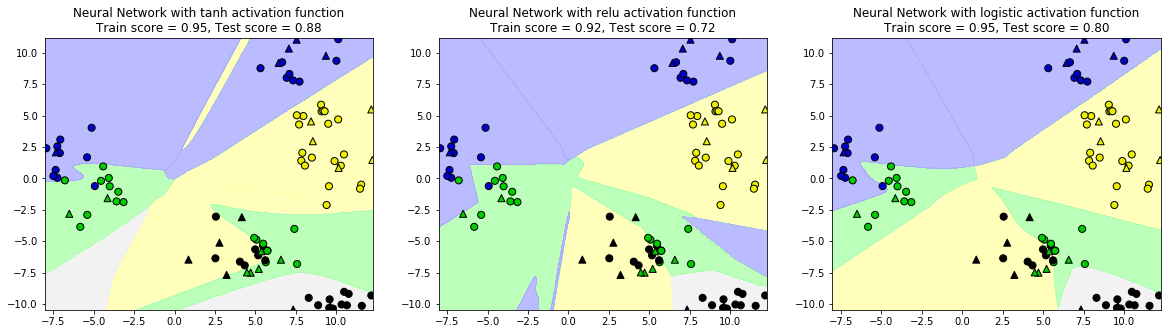

In [124]:
print('Double Hidden Layer')
fig,axes = plt.subplots(1,3,figsize=(20,5))
for i, u in enumerate(['tanh', 'relu', 'logistic']):
    mlp = MLPClassifier(hidden_layer_sizes=[10,10],solver='lbfgs',activation=u, alpha=0.01 ,random_state=0).fit(X_train, y_train)
    plot_class_regions_for_classifier_subplot(mlp, X_train, y_train, X_test, y_test, 'Neural Network with {} activation function'.format(u), axes[i]) 

# Neural Network Regression

In [127]:
from sklearn.metrics import mean_squared_error

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

from sklearn.neural_network import MLPRegressor

for activation in ['relu', 'tanh']:
    for alp in [0.0001,0.01,10]:
        mlpr = MLPRegressor(hidden_layer_sizes=[100,100], alpha=alp, activation=activation,solver='lbfgs',random_state=0 ).fit(X_train, y_train)
        pred = mlpr.predict(X_test)
        
        print('RMSE with activation = {} and alpha={} is {}'.format(activation,alp, np.sqrt(mean_squared_error(y_test, pred))))




RMSE with activation = relu and alpha=0.0001 is 38.418942833768284
RMSE with activation = relu and alpha=0.01 is 38.677230031892336
RMSE with activation = relu and alpha=10 is 39.12661581402252
RMSE with activation = tanh and alpha=0.0001 is 44.10805013325249
RMSE with activation = tanh and alpha=0.01 is 41.033094607551575
RMSE with activation = tanh and alpha=10 is 38.127205529695615


# Applying on Real World Dataset

In [133]:
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,test_size=0.25, random_state = 0)

scale = MinMaxScaler()
Xtrain_s = scale.fit_transform(X_train)
Xtest_s = scale.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=[100,100],alpha=0.01, activation='relu', random_state=0, solver='lbfgs').fit(Xtrain_s, y_train)
print('Accuracy of MPL classifier on Cancer dataset is {}'.format(mlp.score(Xtest_s, y_test)))

Accuracy of MPL classifier on Cancer dataset is 0.9370629370629371
